## 1 Multiple Linear Regression

In the last notebook, we worked with one feature variable and one target, leaving out the other features, which could be a useful source of information for the regression task. We can perform the same procedure (least-squares fitting) for multiple features. In this case, instead of solving the linear equation $\mathbf{y} = b\cdot\mathbf{x} + \mathbf{\epsilon}$ , this is now expanded to solving the matrix equation $\mathbf{y} = \mathbf{X} \mathbf{b} + \mathbf{\epsilon}$, 
with y, b and $\epsilon$ being vectors. 

In [1]:
#imports FOR THIS NOTEBOOK YOU DO NOT NEED ANYMORE PACKAGES! DON'T USE SKLEARN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

/Users/ppp/miniconda2/envs/dlmm-cpu/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


__Task:__ Load the data into a pandas dataframe and print the first eight samples!

In [2]:
data = pd.read_csv("us_fuel_consumption.csv")
data.head(8)

,petrol_tax,avg_income,highway_miles,pct_drivers_license,fuel_consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467


Your task is again to predict _fuel_consumption_. In univariate regression we used only a single predictor and selected it by visual inspection. Lets recap the visualization. This time using the *Seaborn* plotting package.

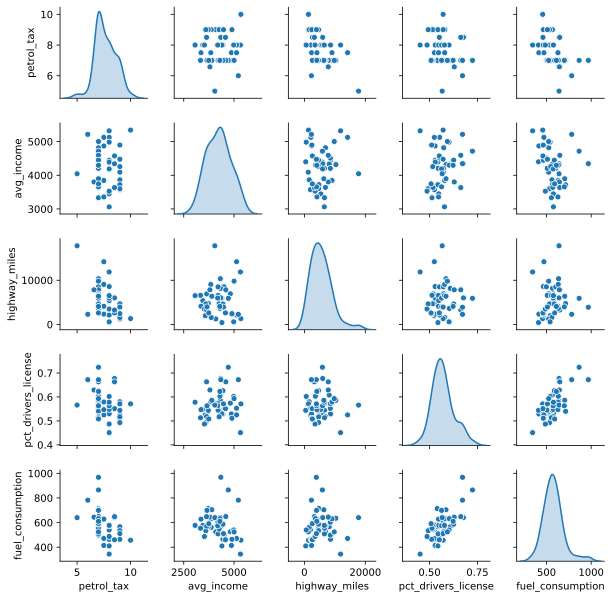

In [3]:
p=sns.pairplot(data,diag_kind='kde',height=1.7)

As we will work a lot with *Numpy* it might be easier to convert the data to 1d and 2d numpy arrays. We will call our dependent variable y and the feature matrix X.

In [4]:
tmp = data.to_numpy()
X = tmp[:,:-1]
y = tmp[:,-1]

__Task:__ The solution for the multivariate problem follows the same principle as in the univariate case: Minimizing the squared norm of the prediction error $\mathbf{\epsilon}$. Try to derive the closed form solution with paper and pencil (Something to put in the Lab Book, isn't it?). And implement it in the following cell. 

In [5]:
#determine the regression coefficients here
b = (np.linalg.inv(X.T@X)@X.T)@y
print('regression coefficients: ' + np.array2string(b,precision=2))
y_pred = X@b
mse = np.sum((y-y_pred)**2)/len(y)
print("mean squared error of fit: %.3f" %mse)

regression coefficients: [-1.42e+01 -5.94e-02  1.20e-03  1.63e+03]
mean squared error of fit: 4317.280


We use seaborn again to plot the result of our fit. In Multiple Linear Regression we can not simply plot the dependency between features and target, as we have multiple dimensions. A standard tool to inspect a fit or also predictions is a so called scatter plot which shows the relation between predicted and observered values of the *fuel_consumption*. We will use a *jointplot* from Seaborn, which extends the scatter plot by a histogram of the two variables.

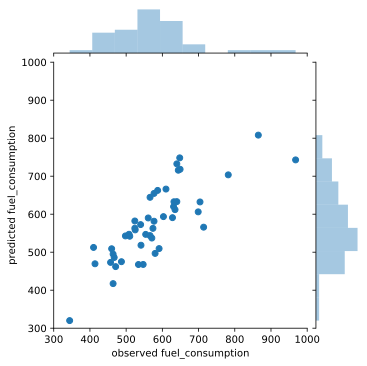

In [6]:
# predicted/actual plot for visualizing accuracy
ax = sns.jointplot(x=y,y=y_pred, height=5, xlim=(300,1000), ylim=(300,1000))
ax.ax_joint.set_xlabel('observed fuel_consumption')
ax.ax_joint.set_ylabel('predicted fuel_consumption')
plt.show()

__Task:__ What is your personal opinion about the plot? Would you call this a *good fit*? Why? Why not? Do you see any surprising predictions? (Lab Book, eh?)

#### Basic Data Splits

Currently the model is only used on know data, which means we have no idea how good out prediction would be for new/unknown input. To adress this, we have to separate our dataset into training and testing.
__Task:__ Complete the cell below to end up with the indices for a *Random Split* with given percentage of the data to serve as training set!

In [7]:
testsize = 0.33
ntest = int(np.ceil(testsize*len(y)))
idx = np.arange(0,len(y))
np.random.shuffle(idx)
train_index = idx[ntest:]
test_index = idx[:ntest]
print('Train:')
print(train_index)
print('Test:')
print(test_index)

Train:
[26 32 23 34  5 44 43 25 27 35 16  9 47 14 21 12 28 45 15  3 18 36 33  6
  4 20 29  8 37  7 31 40]
Test:
[39  0  1 22 24  2 42 46 13 30 10 11 17 19 38 41]


Equipped with the indices we can split the data.

In [8]:
X_train = X[train_index,:]
X_test = X[test_index,:]
y_train = y[train_index]
y_test = y[test_index]

__Task:__ Complete the cell below. Build your model with the training set, predict the training set to see the goodness of your fit. Then predict the test set to get an idea how your model is able to generalize to unseen data.

In [9]:
#fitting to find values for b with X_train
X_pseud = np.linalg.inv((X_train.T@X_train))@X_train.T

b = X_pseud@y_train
print('regression coefficients: ' + np.array2string(b,precision=2))

# regression for our training set
y_pred_train = X_train@b

# prediction for our testing set
y_pred_test = X_test@b

mset = np.sum((y_train-y_pred_train)**2)/len(y_train)
print("mean squared error of training fit: %.3f" %mset)
msep = np.sum((y_test-y_pred_test)**2)/len(y_test)
print("mean squared error of prediction: %.3f" %msep)

regression coefficients: [-8.93e+00 -6.69e-02  1.75e-03  1.60e+03]
mean squared error of training fit: 2619.334
mean squared error of prediction: 7972.983


__Task:__ Use a scatter- or joint plot to visualize your predictions for the test and the training set!

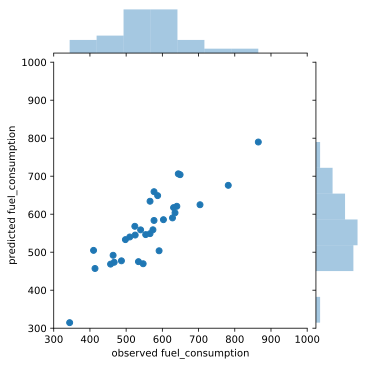

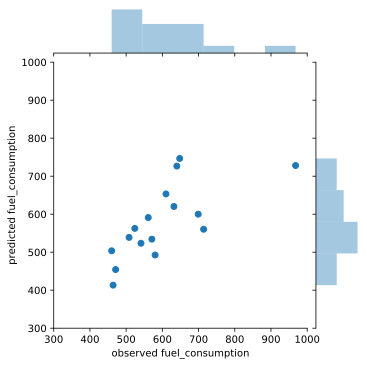

In [10]:
# predicted/actual plot for visualizing accuracy
ax = sns.jointplot(x=y_train,y=y_pred_train, height=5,xlim=(300,1000),ylim=(300,1000))
ax.ax_joint.set_xlabel('observed fuel_consumption')
ax.ax_joint.set_ylabel('predicted fuel_consumption')

# predicted/actual plot for visualizing accuracy
ax = sns.jointplot(x=y_test,y=y_pred_test, height=5,xlim=(300,1000),ylim=(300,1000))
ax.ax_joint.set_xlabel('observed fuel_consumption')
ax.ax_joint.set_ylabel('predicted fuel_consumption')
plt.show()

__Task:__ As we deal with a random split, repeat the procedure several times to see if and how the errors vary. Try different sizes for the test set. 

Our dataset contains 48 samples. By using Leave-One-Out-Cross-Validation (LOOCV), we do not have to waste a decent amout of data for the test set. Furthermore we can get an intuition how the model varies if we slightly change the training set. This can also reveal interesting samples. 

__Task:__ Complete the code below to run a LOOCV. Finally compute the MSEs of fitting and of the predictions by averaging over all results. 

In [11]:
bs = np.empty((X.shape))
rs_test = np.empty((y.shape))
rs_train = np.empty((y.shape[0],y.shape[0]-1))
idx = np.arange(0,len(y))
for kk in range(len(y)):
    mask = np.ones(len(idx), dtype=bool)
    mask[kk] = False
    test_index = kk
    train_index = idx[mask]
    print('Left out sample: ' + str(kk))
    if kk < 2:
        print('Train:')
        print(train_index)
        print('Test:')
        print(test_index)
    X_train = X[train_index,:]
    X_test = np.expand_dims(X[test_index,:],0)
    y_train = y[train_index]
    y_test = np.expand_dims(y[test_index],-1)
    #fitting to find values for b with X_train
    X_pseud = np.linalg.inv((X_train.T@X_train))@X_train.T
    b = X_pseud@y_train
    # regression for our training set
    y_pred_train = X_train@b
    # prediction for our testing set
    y_pred_test = X_test@b
    rs_train[kk,:] = (y_train - y_pred_train).reshape(1,-1)
    rs_test[kk] = y_test - y_pred_test   
    bs[kk,:] = np.expand_dims(b,0)
    print('regression coefficients: ' + np.array2string(b,precision=2))
    print('-----')
mset = np.sum((rs_train.flatten())**2)/len(rs_train.flatten())
print("mean squared error of training fit: %.3f" %mset)
msep = np.sum((rs_test)**2)/len(rs_test)
print("mean squared error of prediction: %.3f" %msep)

Left out sample: 0
Train:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Test:
0
regression coefficients: [-1.50e+01 -5.84e-02  1.25e-03  1.63e+03]
-----
Left out sample: 1
Train:
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Test:
1
regression coefficients: [-1.36e+01 -6.00e-02  9.78e-04  1.63e+03]
-----
Left out sample: 2
regression coefficients: [-1.36e+01 -6.04e-02  1.07e-03  1.63e+03]
-----
Left out sample: 3
regression coefficients: [-1.49e+01 -5.55e-02  7.58e-04  1.62e+03]
-----
Left out sample: 4
regression coefficients: [-1.44e+01 -5.63e-02  2.14e-04  1.62e+03]
-----
Left out sample: 5
regression coefficients: [-1.40e+01 -5.84e-02  1.07e-03  1.62e+03]
-----
Left out sample: 6
regression coefficients: [-1.47e+01 -6.20e-02  8.20e-04  1.66e+03]
-----
Left out sample: 7
regression coeffici

__Task:__ Provide a plot (Bar plot with standard error, Boxplot, ... ) to plot the regression coefficients of the 48 submodels. Which coefficients vary the most?

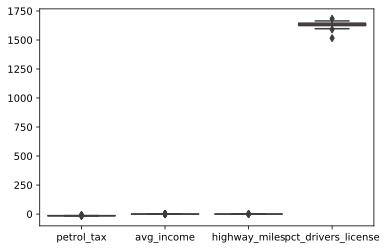

In [12]:
feat = data.columns
coef = pd.DataFrame(columns=feat[:-1], data=bs)
#coef = pd.DataFrame(columns=feat[:-1], data=(bs/bs.max(axis=0)))
sns.boxplot(data=coef)
plt.show()

### Numerical Stability

So far we used the straight forward calculation of the Moore-Penrose pseudoinverse. We directly invert $X^TX$, which means that it only works if $det(X^TX)\neq 0$. In practice, this is not necessarily the case, for example if the columns (the features) of X are not linearly indepentent (=collinearity). 
We introduce a fancy new feature which is a linear combination of already existing features.

__Task:__ Complete the code in the cell below to calculate the pseudoinverse directly. Check the MSE for different values of $k$. What happens if $k=0$

In [13]:
k=0.1
new_fancy_feature = np.expand_dims(X[:,-1]+k*X[:,2]-k*X[:,1],-1)
X_new = np.hstack((X,new_fancy_feature))
c = np.linalg.cond(X_new.T@X_new)
print("Condition Number of X_new.T@X_new: " + np.array2string(c,precision=2))
X_pseud_new = np.linalg.inv((X_new.T@X_new))@X_new.T
b = X_pseud_new@y
print('regression coefficients: ' + np.array2string(b,precision=2))
y_pred = X_new@b
mse = np.sum((y-y_pred)**2)/len(y)
print("mean squared error of fit: %.3f" %mse)

Condition Number of X_new.T@X_new: 1.1e+19
regression coefficients: [-3.88e+03  8.03e+00 -1.21e+00  1.62e+03  7.62e+00]
mean squared error of fit: 27198409.605


An alternative to the direct calculation of the pseudoinverse is `np.linalg.pinv()`.

__Task:__ Calculate the pseudoinverse of $X_{new}$ using the mentioned numpy routine!

In [14]:
X_pseud_np = np.linalg.pinv(X_new)
b = X_pseud_np@y
y_pred = X_new@b
print('regression coefficients: ' + np.array2string(b,precision=2))
mse = np.sum((y-y_pred)**2)/len(y)
print("mean squared error of fit: %.3f" %mse)

regression coefficients: [-14.24  80.68 -80.74 823.52 807.37]
mean squared error of fit: 4317.280


__Task:__ Compare the MSE for different $k$. Do you have an idea why the solution using `np.linalg.pinv()` works better?